# <center> Module 3d - Fun with Wireshark
## <center> SYSE 549: Secure Vehicle and Industrial Networking
## <center> <img src="https://www.engr.colostate.edu/~jdaily/Systems-EN-CSU-1-C357.svg" width="400" /> 
### <center> Instructor: Dr. Jeremy Daily<br>Written By: Jerry Duggan

## Learning Objective
By the end of this lesson, students should be able to:
1. Carry out the installation of Wireshark on their local computer.
2. Filter network packets to focus on specific data streams.
3. Use Wireshark to deconstruct network traffic.
4. Verify the leyered encapsulation process of sending and receiving network traffic.

## Introduction
Wireshark is an incredibly powerful and useful network analysis tool.  Fundamentally, it allows you to watch & record network traffic.  It is protocol-aware for most popular protocols -- it has the ability to 'disassemble' network packets. This exercise will go through the steps to get it installed on your system and how to apply it to the basic client / server example.

Step 1 -- Download & install Wireshark from https://www.wireshark.org/#download.  Note -- the steps below only highlight dialog boxes which are somewhat tricky.  They don't include things like accepting licenses, install locations, etc.  For those, use your best judgement.
* Accept all the default components to install:
![WiresharkComponents.jpg](images\WiresharkComponents.jpg)
* Select if & where you want startup icons.  I prefer to keep the Wireshark icon on my desktop:
![WiresharkShortcuts.jpg](images\WiresharkShortcuts.jpg)
* Wireshark requres a network packet capture library to do its thing.  I strongly recommend using npcap as opposed to WinPcap, as the latter is not actively maintained:
![WiresharkNpcap.jpg](images\WiresharkNpcap.jpg)
* We will not be using USB packet capture in this class, so go ahead and *not* select the 'Install USBPcap' option.  Besides, any component that recommends creating a system restore point before installation makes me nervous.  On my system, this is the last dialog, so go ahead and click 'Install':
![WiresharkUSBPcap.jpg](images\WiresharkUSBPcap.jpg)
* Go ahead and accept license agreements & default options for npcap.
* Click 'Finish' when Wireshark install is complete.

Step 2 -- Start Wireshark
* I prefer to have the Wireshark icon on my desktop.  It is, well, a shark fin (I see what they did there!):
![WiresharkDesktop.jpg](images\WiresharkDesktop.jpg)
* The startup screen for wireshark can be a bit intimidating.  There is an entry for every network interface on your system, and it is sometimes hard to figure out which one to use.  The startup screen provides a helpful mini-network traffic graph next to the interfaces it lists, which is helpful -- you generally want to select an interface that has traffic on it.  For our purposes, select the one labelled 'Adapter for loopback traffic capture'.  To start the capture, double click the adapter you want:
![WiresharkStartup.jpg](images\WiresharkStartup.jpg)
* The next screen is the packet capture screen:
![WiresharkInitialCapture.jpg](images\WiresharkInitialCapture.jpg)
* It won't be long until you start to see some random traffic on this interface:
![WiresharkCruft.jpg](images\WiresharkCruft.jpg)
* We will eliminate the cruft by setting a packet capture filter.  Stop the capture, then click the 'capture options' icon:
![WiresharkStopCapture.jpg](images\WiresharkStopCapture.jpg)
* I had some IPV6 traffic on my network, which I don't want to see.  Also, I only want to see traffic for port 12354, the port we will be using in the exercise.  I specify these capture options, then click 'Start' to restart the capture:
![WiresharkCaptureOptions.jpg](images\WiresharkCaptureOptions.jpg)

Step 3 -- Wireshark monitoring of Basic Client / Server example
* There is no network traffic when running the example until the client connects to the server.  At this point, the Wireshark capture window should look something like this.  While there is a lot of information in these packets, the only fields that are relevant to us at this time are the 'Source Port' and 'Destination Port' fields.  Remember, this is from the point of view of the client, so 'Source Port' is the client port and 'Destination Port' is the server port:
![WiresharkClientConnection.jpg](images\WiresharkClientConnection.jpg)
* After the client sends its client data, but before the server echoes it, Wireshark looks like this.  Packet 5 is the transmission of the 'Hello, world' data from the client to the server.  If you select the 'Data' field in the packet detail window, the corresponding bytes are highlighted in the binary packet window.  This is a *very* handy feature.  Packet 6 is the confirmation from the server to the client that the packet has been received (remember, this example uses stream oriented sockets):
![WiresharkClientSendall.jpg](images\WiresharkClientSendall.jpg)
* When the server echoes the data back to the client, the packets are very similar, though the roles of 'Source Port' and 'Destination Port' are reversed -- the server is sending the data from port 12354, and the client is receiving it on its local port:
![WiresharkServerSendall.png](images\WiresharkServerSendall.png)

Step 4 -- Wireshark monitoring of UDP Client / Server example
* The network traffic in the UDP (datagram) version of the example is considerably simpler.  This is the wireshark trace after the client sends its data to the server:
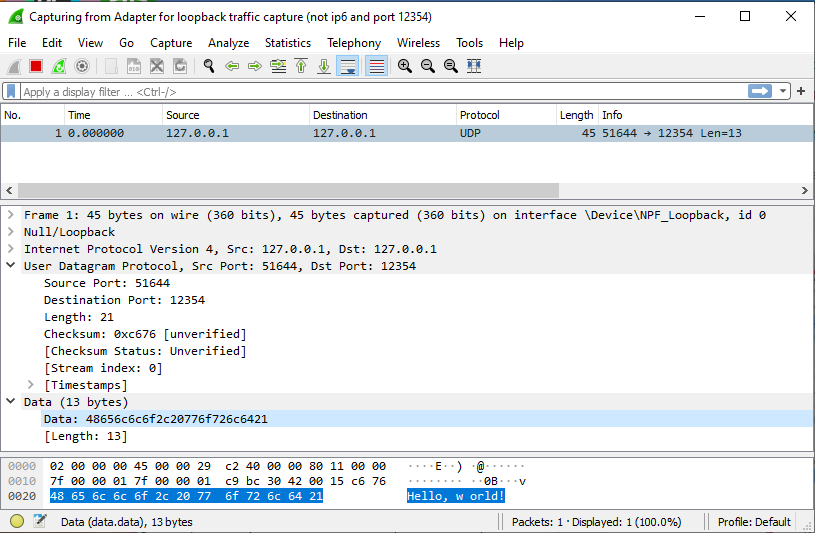
* And this is the wireshark trace after the server echoes the data:
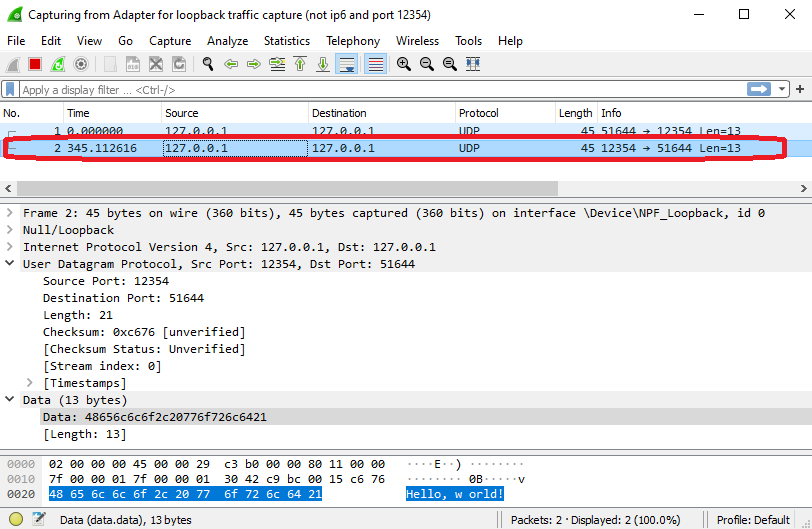